In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('pet_supplies_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [3]:
df.head(100)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,MEDIUM,21.14,617.64,7.0,1
96,97,Accessory,Bird,LARGE,42.99,1417.24,5.0,0
97,98,Equipment,Cat,Small,27.95,1026.77,6.0,1
98,99,Equipment,Dog,Large,38,1447.26,5.0,0


In [6]:
#Check number of null values in each column
df.isna().sum()


product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [5]:
df['category'].value_counts() 

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [7]:
# replace '-' with 'Unknown' in the column 'category'
df['category'] = df['category'].replace('-','Unknown')
df.head(100)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,MEDIUM,21.14,617.64,7.0,1
96,97,Accessory,Bird,LARGE,42.99,1417.24,5.0,0
97,98,Equipment,Cat,Small,27.95,1026.77,6.0,1
98,99,Equipment,Dog,Large,38,1447.26,5.0,0


In [8]:
df['animal'].value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [9]:
df['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [14]:
# replace values to the correct capitalizations in the column 'size' 
df['size']=df['size'].apply(str.capitalize)
df.head(100)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,Medium,21.14,617.64,7.0,1
96,97,Accessory,Bird,Large,42.99,1417.24,5.0,0
97,98,Equipment,Cat,Small,27.95,1026.77,6.0,1
98,99,Equipment,Dog,Large,38.00,1447.26,5.0,0


In [11]:
df['price'].value_counts()

unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
38.66         1
36            1
19.97         1
39.19         1
25.79         1
Name: price, Length: 707, dtype: int64

In [16]:
# replace 'unlisted' with NaN in the column 'price'
df['price'].replace((['unlisted'], [np.NaN]), inplace=True)
# fill NaN values with the median value in the column 'price'
df['price'] = df['price'].fillna(df['price'].median(), inplace=False)
# convert datatype of column 'price'
df['price'] = df['price'].astype('float')
df.head(100)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,Medium,21.14,617.64,7.0,1
96,97,Accessory,Bird,Large,42.99,1417.24,5.0,0
97,98,Equipment,Cat,Small,27.95,1026.77,6.0,1
98,99,Equipment,Dog,Large,38.00,1447.26,5.0,0


In [17]:
df['sales'].value_counts()

1034.36    3
742.87     2
1342.90    2
1031.11    2
1348.27    2
          ..
1072.20    1
727.87     1
1460.29    1
1196.56    1
826.08     1
Name: sales, Length: 1476, dtype: int64

In [19]:
df['rating'].value_counts()

5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

In [20]:
# fill missing values in the column 'rating' with 0
df['rating'] = df['rating'].fillna('0', inplace = False)
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   object 
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,Medium,21.14,617.64,7.0,1
96,97,Accessory,Bird,Large,42.99,1417.24,5.0,0
97,98,Equipment,Cat,Small,27.95,1026.77,6.0,1
98,99,Equipment,Dog,Large,38.00,1447.26,5.0,0


In [21]:
# convert datatype of column 'rating'
df['rating'] = df['rating'].astype(int)
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7,1
1,2,Housing,Bird,Medium,35.98,963.60,6,0
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1
...,...,...,...,...,...,...,...,...
95,96,Housing,Cat,Medium,21.14,617.64,7,1
96,97,Accessory,Bird,Large,42.99,1417.24,5,0
97,98,Equipment,Cat,Small,27.95,1026.77,6,1
98,99,Equipment,Dog,Large,38.00,1447.26,5,0


In [22]:
df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

**Task 1**
This dataset contains 1500 rows and 8 columns. For each column, the analysis is shown as below:
- **product_id**: Values match the description given. There are no missing values. 
- **category**: Some values does not match the description given (missing). There are 25 missing values (displayed as '-'). I replaced the missing values with 'Unknown'.
- **animal**: Values match the description given. There are no missing values.
- **size**: Some values does not match the description given (wrong capitalizations). There are no missing values. I adjust the capitalizations to meet the requirement.
- **price**: Some values does not match the description given (missing). There are 150 missing values (displayed as 'unlisted'). I replaced 'unlisted' with the overall median price, and I also converted the datatype to float.
- **sales**: Values match the description given. There are no missing values.
- **rating**: Values match the description given. There are 150 missing values (displayed as 'null'). I replaced the missing values with 0, and converted the datatype to int.    
- **repeat_purchase**: Values match the description given. There are no missing values.

In [27]:
# grouped pet sales by column 'repeat_purchase'
grp_pet_sales = df.groupby('repeat_purchase').count().reset_index()
grp_pet_sales
df["count"] = 1

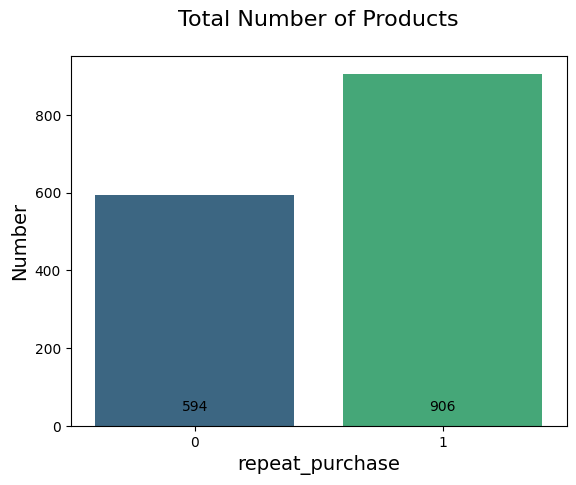

In [80]:

fg = sns.barplot(x='repeat_purchase', y='count', data = grp_pet_sales, palette='viridis')

# set the labels
fg.set_xlabel("repeat_purchase", fontsize=14)
fg.set_ylabel("Number", fontsize=14)

# set the title
fg.set_title("Total Number of Products", y=1.06, fontsize=16)

# set the xtick labels
fg.set_xticklabels(["0", "1"])

# show the values in the container
fg.text(1, 40, grp_pet_sales["count"][1], color='black', ha='center')
fg.text(0, 40, grp_pet_sales["count"][0], color='black', ha='center')

# show the plot
plt.show()

**Task 2**
A. As shown in the visualization "Total Number of Products", category of the variable repeat purchases has the most observations is 1 with 906 observations.
B. The observations are not balanced across categories of the variable repeat purchases since the number of repeat (category 1) is much greater than the number of not repeat (category 0).

In [93]:
df_bool = (df['sales'] >= 2245) & (df['sales'] <= 2250)
print(df_bool.sum())

4


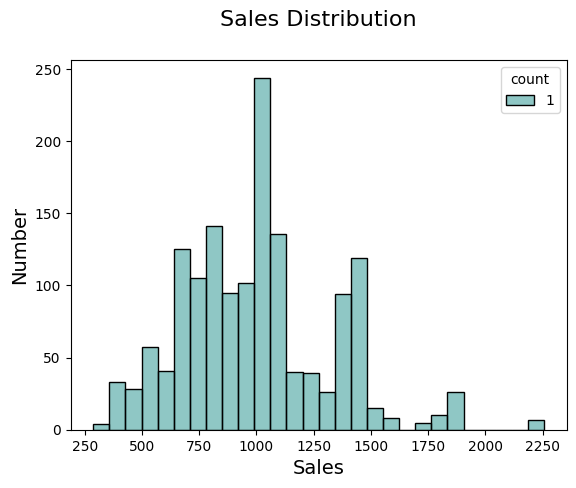

In [56]:
# Distribution of all of the sales
sales_vs_rebuy = df[["category", "sales", "repeat_purchase", "count"]]

# make a histogram plot to see the distribution of sales
fg = sns.histplot(x='sales', data=sales_vs_rebuy, hue='count', multiple="layer", palette='viridis')

# set the x and y label
fg.set_xlabel("Sales", fontsize=14)
fg.set_ylabel("Number", fontsize=14)

# set the title
fg.set_title("Sales Distribution", y=1.07, fontsize=16)

# tighten the plot
#plt.tight_layout()

# show plot
plt.show()

**Task 3**
The histogram "Sales Distribution" above displays the distribution of all of the sales.
The distribution is not normal. Most of the sales values are in the range between 800 and 1100.
Mode is approximately 250 for values between 1000 and 1070. The outliers are values approximately 2250.
As the histogram shown, there are no sales values between 1900 and 2200.


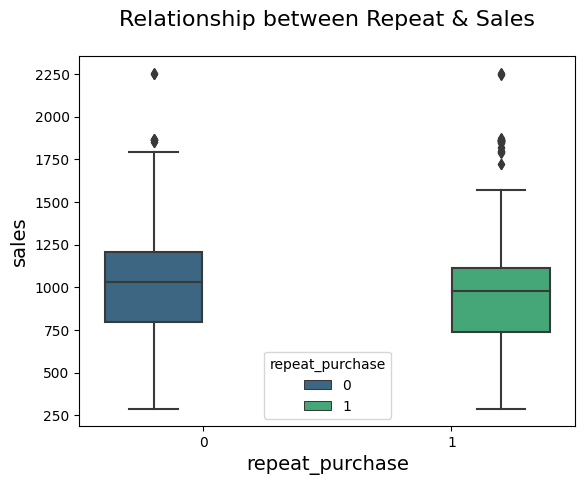

In [79]:
# Relationship between repeat_purchase and sales
fg = sns.boxplot(data=sales_vs_rebuy, x="repeat_purchase", y="sales", hue="repeat_purchase", palette="viridis")

# setting x and y label
fg.set_xlabel("repeat_purchase", fontsize=14)
fg.set_ylabel("sales", fontsize=14)

# setting title label
fg.set_title("Relationship between Repeat & Sales", y=1.06, fontsize=16)


# show plot
plt.show()

In [97]:
sales_vs_rebuy_category_1 = sales_vs_rebuy[sales_vs_rebuy['repeat_purchase'] == 1]
sales_vs_rebuy_category_0 = sales_vs_rebuy[sales_vs_rebuy['repeat_purchase'] == 0]

print(np.percentile(sales_vs_rebuy_category_0.sales, [25, 50, 75]))
print(np.percentile(sales_vs_rebuy_category_1.sales, [25, 50, 75]))

[ 795.745  1030.185  1208.8925]
[ 738.4525  978.21   1112.0075]


**Task 4**
The box plot "Relationship between Repeat & Sales" above displays the relationship between repeat purchases and sales.
In both categories of the repeat_purchase, there are outliers with values approximately 2250.
The number of outliers in the case of category 1 is much greater than in the case of category 0.  
When the repeat happens (category 1), all three important values: lower quartile Q1, median Q2 and upper quartile Q3 seem to be lower than those of category 0.  
As calculated in the cell right above:
- Q1 for category 0 is 795.745, Q1 for category 1 is 738.4525
- Median (Q2) for category 0 is 1030.185, Median for category 1 is 978.21
- Q3 for category 0 is 1208.8925, Q3 for category 1 is 1112.0075  